# 모듈 임포트

In [48]:
import numpy as np
import pandas as pd
import re

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')


# 데이터 불러오기

In [2]:
tokyo_df = pd.read_csv('../datasets/tokyo_listings_raw.csv')

In [3]:
tokyo_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20210327014458,2021-03-28,Oshiage Holiday Apartment,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,...,10.0,9.0,10.0,M130003350,f,1,1,0,0,1.42
1,776070,https://www.airbnb.com/rooms/776070,20210327014458,2021-03-28,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,https://www.airbnb.com/users/show/801494,...,10.0,10.0,10.0,M130000243,t,1,0,1,0,2.25
2,899003,https://www.airbnb.com/rooms/899003,20210327014458,2021-03-29,"Classy room @Shinjuku, Takadanoba",..*+;.*:' Popular room in Airbnb@Tokyo *;+:..*...,NaN,https://a0.muscache.com/pictures/20005274/1df3...,4799233,https://www.airbnb.com/users/show/4799233,...,9.0,9.0,9.0,Other reasons | 【マンスリー契約】最低30泊以上の一時使用賃貸借契約を結びま...,f,2,2,0,0,0.94
3,1016831,https://www.airbnb.com/rooms/1016831,20210327014458,2021-03-29,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,female travellers here only.<br />Sorry no boy...,The location is walkable distance to famous Sh...,https://a0.muscache.com/pictures/20134416/5c34...,5596383,https://www.airbnb.com/users/show/5596383,...,10.0,10.0,10.0,M130001107,f,1,0,1,0,2.17
4,1033276,https://www.airbnb.com/rooms/1033276,20210327014458,2021-03-29,private room @Senju area,Our house is new and clean <br />Big hub stati...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/71577415/b060...,5686404,https://www.airbnb.com/users/show/5686404,...,10.0,9.0,9.0,M130007760,f,2,0,2,0,0.75


# 탐색적 데이터 분석 (EDA)

## 데이터셋 기본 정보 확인

In [4]:
tokyo_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [49]:
tokyo_df.shape

(10922, 35)

In [6]:
tokyo_df.info() #컬럼, 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11197 entries, 0 to 11196
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11197 non-null  int64  
 1   listing_url                                   11197 non-null  object 
 2   scrape_id                                     11197 non-null  int64  
 3   last_scraped                                  11197 non-null  object 
 4   name                                          11197 non-null  object 
 5   description                                   11196 non-null  object 
 6   neighborhood_overview                         8768 non-null   object 
 7   picture_url                                   11197 non-null  object 
 8   host_id                                       11197 non-null  int64  
 9   host_url                                      11197 non-null 

In [7]:
tokyo_df.duplicated().sum()  #중복된 내용 제거 (없으나 확인차 실행)
tokyo_df.drop_duplicates(inplace=True)

In [8]:
#프로젝트에 불 필요한 행을 제외하고 광범위하게 추출
selected_cols=[ 'id', 'host_since', 'host_response_rate', 'host_acceptance_rate',
                'host_is_superhost','host_has_profile_pic', 'neighbourhood_cleansed',
                'latitude', 'longitude', 'property_type',
                'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
                'amenities', 'price', 'minimum_nights', 'maximum_nights',
                'has_availability', 'availability_30', 'availability_60', 'availability_90',
                'availability_365', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating',
                'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                'review_scores_communication', 'review_scores_location',
                'review_scores_value', 'instant_bookable','reviews_per_month']

tokyo_df = tokyo_df[selected_cols].set_index('id')

tokyo_df.shape

(11197, 35)

In [9]:
tokyo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11197 entries, 197677 to 48867018
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   10892 non-null  object 
 1   host_response_rate           9152 non-null   object 
 2   host_acceptance_rate         9845 non-null   object 
 3   host_is_superhost            10892 non-null  object 
 4   host_has_profile_pic         10892 non-null  object 
 5   neighbourhood_cleansed       11197 non-null  object 
 6   latitude                     11197 non-null  float64
 7   longitude                    11197 non-null  float64
 8   property_type                11197 non-null  object 
 9   room_type                    11197 non-null  object 
 10  accommodates                 11197 non-null  int64  
 11  bathrooms_text               11192 non-null  object 
 12  bedrooms                     10186 non-null  float64
 13  beds    

## 종속 변수 (목표 변수) 탐색 및 전처리

In [10]:
tokyo_df['price'].head()

id
197677     $11,000.00
776070      $7,677.00
899003      $5,200.00
1016831     $4,000.00
1033276    $30,000.00
Name: price, dtype: object

### 문자열 숫자열로 변환

In [11]:
tokyo_df['price'] = tokyo_df["price"].str.replace("[$, ]",'').astype(float) #‘price’의 데이터가 object형인 것을 확인 했기때문에 $ 기호 제거 및 float로 변경 

C:\Users\tyler\anaconda3\envs\AI_exam\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [12]:
tokyo_df['price'].describe() 

count      11197.000000
mean       12843.618826
std        32150.627375
min            0.000000
25%         4500.000000
50%         7800.000000
75%        13000.000000
max      1000000.000000
Name: price, dtype: float64

### 분포 확인과 이상치 제거

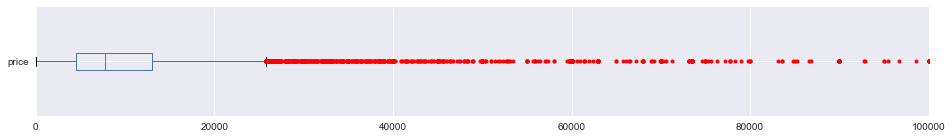

In [13]:
# boxplot을 활용하여 분포 확인
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
tokyo_df['price'].plot(kind='box', xlim=(0, 100000), vert=False, flierprops=red_square, figsize=(16,2));

In [14]:
# 50000 옌 이상의 데이터 drop
tokyo_df.drop(tokyo_df[ (tokyo_df.price > 50000) | (tokyo_df.price == 0) ].index, axis=0, inplace=True)

### 목표변수 분포 확인

In [15]:
tokyo_df['price'].describe()

count    10922.000000
mean     10085.516114
std       8433.416755
min        880.000000
25%       4443.000000
50%       7500.000000
75%      12429.000000
max      50000.000000
Name: price, dtype: float64

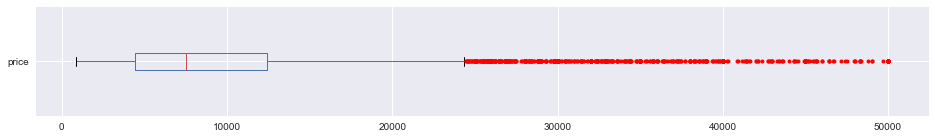

In [16]:
tokyo_df['price'].plot(kind='box', vert=False, flierprops=red_square, figsize=(16,2));

C:\Users\tyler\anaconda3\envs\AI_exam\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tyler\anaconda3\envs\AI_exam\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tyler\anaconda3\envs\AI_exam\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tyler\anaconda3\envs\AI_exam\lib\site-packages\matplotlib\backends\

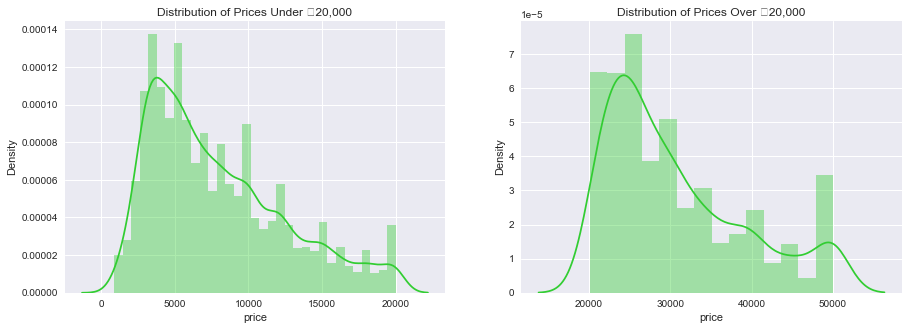

In [17]:
# 분포가 편중되어 있으므로 두그룹으로 나누어 분포확인

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

ax0 = sns.distplot(tokyo_df[tokyo_df['price'] <= 20000]['price'], ax=axs[0], color='limegreen')
ax0.set_title('Distribution of Prices Under ￥20,000')

ax1 = sns.distplot(tokyo_df[tokyo_df['price'] > 20000]['price'], ax=axs[1], color='limegreen')
ax1.set_title('Distribution of Prices Over ￥20,000');

## 설명 변수 탐색 및 전처리

In [18]:
#데이터 확인
tokyo_df.head()

,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
197677,2011-08-13,100%,83%,f,t,Sumida Ku,35.71721,139.82596,Entire apartment,Entire home/apt,...,2020-03-04,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,1.42
776070,2011-07-10,100%,100%,t,t,Kita Ku,35.73844,139.76917,Private room in house,Private room,...,2020-01-18,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2.25
899003,2013-01-22,100%,100%,f,t,Shinjuku Ku,35.71019,139.69755,Entire apartment,Entire home/apt,...,2019-11-25,90.0,9.0,8.0,9.0,9.0,9.0,9.0,f,0.94
1016831,2013-03-24,100%,NaN,f,t,Setagaya Ku,35.65800,139.67134,Private room in house,Private room,...,2020-03-16,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.17
1033276,NaN,NaN,NaN,NaN,NaN,Adachi Ku,35.74437,139.79739,Private room in house,Private room,...,2018-06-17,91.0,10.0,9.0,10.0,10.0,9.0,9.0,f,0.75


In [19]:
#데이터 타입확인
tokyo_df.dtypes

host_since                      object
host_response_rate              object
host_acceptance_rate            object
host_is_superhost               object
host_has_profile_pic            object
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms_text                  object
bedrooms                       float64
beds                           float64
amenities                       object
price                          float64
minimum_nights                   int64
maximum_nights                   int64
has_availability                object
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
number_of_reviews                int64
first_review                    object
last_review              

In [20]:
# 특정 컬럼을 수정하여 올바른 형식으로 변환하는 함수 행성
# host_response_rate, host_acceptance_rate : object타입을 float 타입으로
# host_since, first_review, last_review : object타입을 Date타입 으로

def fix_dtypes(df):
    df = df.assign(
        host_response_rate = df["host_response_rate"].str.replace("[%, ]",'').astype(float),
        host_acceptance_rate = df["host_acceptance_rate"].str.replace("[%, ]",'').astype(float),
        first_review = pd.to_datetime(df['first_review']), 
        last_review = pd.to_datetime(df['last_review']),
        host_since = pd.to_datetime(df['host_since'])
    )
    return df

In [21]:
# 함수적용
tokyo_df = fix_dtypes(tokyo_df)

C:\Users\tyler\anaconda3\envs\AI_exam\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
C:\Users\tyler\anaconda3\envs\AI_exam\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [22]:
# def get_max_date(df):
#     most_recent_date = max(
#             max(df['host_since']),
#             max(df['first_review']),
#             max(df['last_review'])
#         )
#     return most_recent_date

In [23]:
# most_recent_date = get_max_date(tokyo_df)

### 결측치 처리

In [24]:
tokyo_df.isnull().sum()

host_since                      301
host_response_rate             1979
host_acceptance_rate           1308
host_is_superhost               301
host_has_profile_pic            301
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    4
bedrooms                        977
beds                             73
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review                   1987
last_review                    1987
review_scores_rating           1998
review_scores_accuracy      

In [25]:
print(tokyo_df.host_has_profile_pic.unique())
print(tokyo_df.host_is_superhost.unique())
print(tokyo_df.has_availability.unique())
print(tokyo_df.instant_bookable.unique())

['t' nan 'f']
['f' 't' nan]
['t' 'f']
['f' 't']


In [26]:
def handle_missing(df):

    temp_df = df.copy()
    
    # first_review 컬럼으로 host_since 컬럼 결측값 대체
    temp_df.host_since = df.host_since.fillna(df.first_review)
    
    # 침실, 욕실, 침대 결측값 0으로 대체
    temp_df.bedrooms.fillna(0, inplace = True)
    temp_df.bathrooms_text.fillna('0', inplace = True)
    temp_df.beds.fillna(0, inplace = True)

    # 위에서 확인한 결측값을 f로 대체
    temp_df.host_has_profile_pic.fillna(value='f', inplace=True)
    temp_df.host_is_superhost.fillna(value='f', inplace=True)
    
    # 후에 누락 된 값이있는 행 삭제
    temp_df.dropna(subset = ['host_since','host_has_profile_pic'], inplace = True)
    
    # 결측값이 많고 분석에 유용하지 않은 열을 삭제
    temp_df.drop(['latitude', 'longitude', 'first_review','last_review'], axis = 1, inplace = True)

    # 평점 데이터의 결측값을 평균으로 대체
    temp_df.review_scores_rating = df['review_scores_rating'].fillna(df['review_scores_rating'].mean()) 
    temp_df.review_scores_accuracy = df['review_scores_accuracy'].fillna(df['review_scores_accuracy'].mean()) 
    temp_df.review_scores_cleanliness = df['review_scores_cleanliness'].fillna(df['review_scores_cleanliness'].mean()) 
    temp_df.review_scores_checkin = df['review_scores_checkin'].fillna(df['review_scores_checkin'].mean()) 
    temp_df.review_scores_communication = df['review_scores_communication'].fillna(df['review_scores_communication'].mean()) 
    temp_df.review_scores_location = df['review_scores_location'].fillna(df['review_scores_location'].mean()) 
    temp_df.review_scores_value = df['review_scores_value'].fillna(df['review_scores_value'].mean()) 
    
    temp_df.host_response_rate = df['host_response_rate'].fillna(df['host_response_rate'].mean()) 
    temp_df.host_acceptance_rate = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean()) 
    temp_df.reviews_per_month = df['reviews_per_month'].fillna(df['reviews_per_month'].mean()) 

    return temp_df

In [27]:
tokyo_df2 = handle_missing(tokyo_df)

In [28]:
tokyo_df2.isnull().sum()

host_since                     0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_has_profile_pic           0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
reviews_pe

In [29]:
# bathrooms_text 컬럼의 정보를 bathrooms, shared 컬럼으로 분리

In [30]:
tokyo_df2['shared'] = tokyo_df2['bathrooms_text'].str.contains('shared') # shared가 포함된 열 True로 반환
tokyo_df2['shared'].unique() # NaN값 확인

array([False,  True])

In [31]:
tokyo_df2.shared.fillna(value=False, inplace=True) #NaN값을 False로 채움
tokyo_df2['shared'].unique() # NaN값 확인

array([False,  True])

In [32]:
tokyo_df2['bathrooms_text'] = tokyo_df2["bathrooms_text"].str.extract('(\d+)').astype(float) #정규표현식을 사용하여 문자열 제거

In [33]:
tokyo_df2['bathrooms_text'].isnull().sum() 

125

In [34]:
tokyo_df2.dropna(subset=['bathrooms_text'], inplace=True) #bathrooms 데이터 없는 컬럼 삭제

In [35]:
tokyo_df2.rename({'bathrooms_text':'bathrooms'}, axis='columns', inplace=True) #bathrooms_text 컬럼명 변경
tokyo_df2.head()

,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,shared
id,,,,,,,,,,,,,,,,,,,,,
197677,2011-08-13,100.000000,83.000000,f,t,Sumida Ku,Entire apartment,Entire home/apt,4,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,1.42,False
776070,2011-07-10,100.000000,100.000000,t,t,Kita Ku,Private room in house,Private room,2,1.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2.25,True
899003,2013-01-22,100.000000,100.000000,f,t,Shinjuku Ku,Entire apartment,Entire home/apt,3,1.0,...,90.0,9.0,8.0,9.0,9.0,9.0,9.0,f,0.94,False
1016831,2013-03-24,100.000000,94.214687,f,t,Setagaya Ku,Private room in house,Private room,2,1.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.17,True
1033276,2013-05-03,96.303701,94.214687,f,f,Adachi Ku,Private room in house,Private room,2,1.0,...,91.0,10.0,9.0,10.0,10.0,9.0,9.0,f,0.75,True


In [36]:
tokyo_df2.isnull().sum() #결측치 확인

host_since                     0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_has_profile_pic           0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
reviews_pe

### 데이터 인코딩

In [37]:
tokyo_df2.head()

,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,shared
id,,,,,,,,,,,,,,,,,,,,,
197677,2011-08-13,100.000000,83.000000,f,t,Sumida Ku,Entire apartment,Entire home/apt,4,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,1.42,False
776070,2011-07-10,100.000000,100.000000,t,t,Kita Ku,Private room in house,Private room,2,1.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2.25,True
899003,2013-01-22,100.000000,100.000000,f,t,Shinjuku Ku,Entire apartment,Entire home/apt,3,1.0,...,90.0,9.0,8.0,9.0,9.0,9.0,9.0,f,0.94,False
1016831,2013-03-24,100.000000,94.214687,f,t,Setagaya Ku,Private room in house,Private room,2,1.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.17,True
1033276,2013-05-03,96.303701,94.214687,f,f,Adachi Ku,Private room in house,Private room,2,1.0,...,91.0,10.0,9.0,10.0,10.0,9.0,9.0,f,0.75,True


In [38]:
# pd.set_option('display.max_rows', None) #출력창 늘이기
tokyo_df2['property_type'].value_counts()

Entire apartment             5716
Entire house                 1121
Private room in house         616
Room in hotel                 569
Private room in apartment     518
                             ... 
Private room in camper/rv       1
Entire cottage                  1
Shared room in guesthouse       1
Shared room in dorm             1
Room in apartment               1
Name: property_type, Length: 62, dtype: int64

In [39]:
#pd.reset_option('display.max_rows') #출력창 초기화

In [40]:
# results = Counter()
# tokyo_df['amenities'].str.strip('{}')\
#                .str.replace('"', '')\
#                .str.lstrip('\"')\
#                .str.rstrip('\"')\
#                .str.split(',')\
#                .apply(results.update)

# results.most_common(30)

In [41]:
 def preprocess(df):

    temp_df = df.copy()
          
    temp_df = temp_df.replace(
        {
        'host_is_superhost': {'t': True, 'f': False},
        'host_has_profile_pic': {'t': True, 'f': False},
        'instant_bookable': {'t': True, 'f': False},
        'has_availability': {'t': True, 'f': False},
        }
    )

    # 광범위한 범주 축소
    def recode_prop(value):
        if value not in ['Entire apartment', 'Entire house', 'Private room in house', 'Room in hotel', 'Private room in apartment',
                        'Entire condominium', 'Room in aparthotel', 'Room in boutique hotel', 'Room in hostel', 'Private room in hostel',
                        'Shared room in hostel', 'Entire serviced apartment', 'Shared room in house', 'Entire villa']:     
            return 'other_prop_type'
        return value

    temp_df['property_type'] = temp_df['property_type'].apply(recode_prop)


    #범주형 데이터들 인코딩
    def Encode(df):
        for column in df.columns[df.columns.isin(['neighbourhood_cleansed', 'property_type', 'room_type'])]:
            df[column] = df[column].factorize()[0] #factorize 범주형 
        return df
    
    temp_df = Encode(temp_df)

    return temp_df

In [42]:
tokyo_df3 = preprocess(tokyo_df2)

In [43]:
tokyo_df3['property_type'].value_counts()

0     5716
2     1121
1      616
14     569
4      538
3      518
5      258
7      258
13     228
12     222
9      208
10     190
11     133
8       95
6       80
Name: property_type, dtype: int64

In [44]:
tokyo_df3.head()

,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,shared
id,,,,,,,,,,,,,,,,,,,,,
197677,2011-08-13,100.000000,83.000000,False,True,0,0,0,4,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,False,1.42,False
776070,2011-07-10,100.000000,100.000000,True,True,1,1,1,2,1.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,True,2.25,True
899003,2013-01-22,100.000000,100.000000,False,True,2,0,0,3,1.0,...,90.0,9.0,8.0,9.0,9.0,9.0,9.0,False,0.94,False
1016831,2013-03-24,100.000000,94.214687,False,True,3,1,1,2,1.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,False,2.17,True
1033276,2013-05-03,96.303701,94.214687,False,False,4,1,1,2,1.0,...,91.0,10.0,9.0,10.0,10.0,9.0,9.0,False,0.75,True


In [45]:
tokyo_df3.columns

Index(['host_since', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'shared'],
      dtype='object')

In [46]:
tokyo_heatmap = tokyo_df3[['host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'shared']]

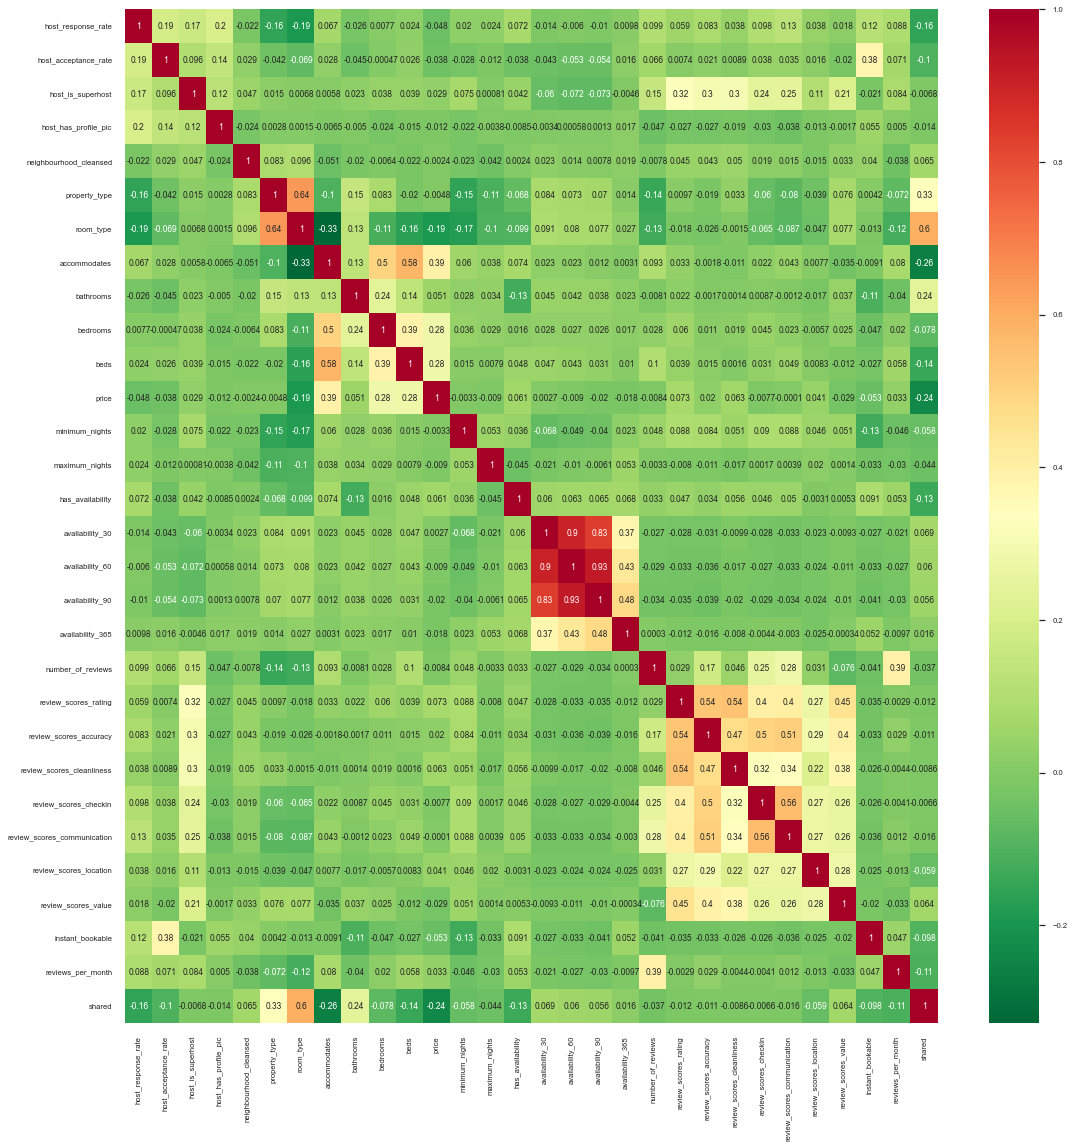

In [47]:
fig = plt.figure(figsize = (16,16))
corr = tokyo_heatmap.corr(method='kendall')
#Pearson : 선형성이 얼마나 강한지(선형성이 강하다 = 변수들의 관계가 직선에 의해 잘모델링 된다.)
#Spearman : 단조성이 강한지(단조성이 좋다 =한 변수의 값이 크기가 커지면 다른변수의 크기도 커진다.)
#Kendall : 단조성이 강한지


sns.set(font_scale=0.7) #heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr, annot = True, cmap = "RdYlGn_r")

plt.tight_layout()
plt.show()